Creare:
1. Dato un file di log vogliamo il numero di interazioni totale (il numero di righe di quel dataframe)
2. la distribuzione del numero di interazioni per utente (group_by sullo userid, count, plot istogramma)
3. numero di attività incluse nel corso
4. barplot (per ogni attività → x, quante interazioni sono relative a quell'attività (group_by attività→ context))
5. barplot dove, per ogni tipo di evento, quante interazioni sono relative a quell'evento (event)
6. dato uno studente creare un plot che mostra il numero di interazioni (x→ tempo (giorni), y→ numero di interazioni)

# Dato un file di log vogliamo il numero di interazioni totale (il numero di righe di quel dataframe)

In [416]:
import matplotlib.pyplot as plt
from datetime import date
from tqdm import tqdm
import pandas as pd
import numpy as np
import statistics
import datetime
import glob
import os

path = '/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Nuovi/_fisica_1.csv' 
path_progress = '/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Progress/progress.iel_-_fisica_1.csv'

In [417]:
header = ['timestamp', 'user_id', 'user_involved', 'context', 'component', 'event', 'description', 'origin', 'ip']

df_new = pd.read_csv(path, sep=',', encoding='utf-8')
df_new.columns = header
df1 = df_new[df_new["user_id"].str.contains("Moodle Analitycs")==False]
df = df1[df1["user_id"].str.contains("-")==False]
print(len(df))

126770


# La distribuzione del numero di interazioni per utente (group_by sullo userid, count, plot istogramma)
Sulla distribuzione del numero di interazioni per utente: potremmo aggiustare l'asse x cosi che sia chiaro a quel range ciascuna barra si riferisce?

In [418]:
us_interaction = df.groupby("user_id").count()

In [419]:
df_inter = df.groupby(by=["user_id"]).size().values

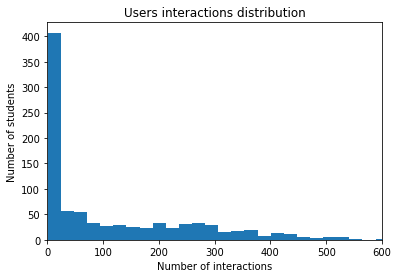

In [420]:
plt.hist(df_inter, bins=500)
plt.title("Users interactions distribution")
plt.xlim(0, 600)
plt.xlabel("Number of interactions")
plt.ylabel("Number of students")
plt.show()

# Numero di attività incluse nel corso
Sul numero di attività incluse nel corso: possiamo anche calcolare quante attività di ogni tipo sono incluse nel corso (e.g., 6 pacchetti scorm, 7 compiti etc)

In [421]:
activity_num = df.groupby(by=["context"]).size()
#print(activity_num)
#print(len(activity_num))

compito = df[df.context.str.contains("Compito:")].context.unique()
print("Compiti: ", len(compito))
print(compito)

pacchetto = df[df.context.str.contains("Pacchetto SCORM")].context.unique()
print("Pacchetto: ", len(pacchetto))
print(pacchetto)

Compiti:  27
['Compito: Esercizi ' 'Compito: Questionari - parte I'
 'Compito: cinematica' 'Compito: Esercitazione 13'
 'Compito: Esercitazione 2' 'Compito: Esercitazione 10'
 'Compito: Esercitazione 2 – Dinamica, parte I'
 'Compito: Esercitazione 4 – Rotazioni'
 'Compito: Esercitazione 6 – Termodinamica'
 'Compito: Esercitazione 3 – Dinamica, parte II'
 'Compito: Esercitazione 1 – Nozioni Introduttive e Cinematica'
 'Compito: Esercitazione 14' 'Compito: soluzione cinematica'
 'Compito: Esercitazione 5' 'Compito: Esercitazioni 3 e 4'
 'Compito: Esercitazione 16' 'Compito: Esercitazione 15'
 'Compito: Esercitazione 5 – Moti oscillatori e onde'
 'Compito: Esercitazione 8' 'Compito: Esercitazione 7'
 'Compito: Esercizio attrito ' 'Compito: Esercitazione 6'
 'Compito: Esercitazione 9' 'Compito: Esercitazione 11'
 'Compito: Esercitazione 12' 'Compito: Questionari finali'
 'Compito: Questionari - parte II']
Pacchetto:  40
['Pacchetto SCORM: Lezione 32' 'Pacchetto SCORM: Lezione 31'
 'Pacchet

# PLOT 2: Barplot (per ogni attività → x, quante interazioni sono relative a quell'attività (group_by attività→ context))
Barplot per ogni attività: attualmente, per come lo hai implemntato è un istogramma non un barplot; poi dobbiamo sistemare le intestazioni degli assi, l'asse y deve essere #interazioni per attività, asse x il nome dell'attività, e per ogni barra (nell'asse x) dobbiamo riportare la stringa con il nome della rispettiva attività 

In [422]:
df_act = df.groupby(by=["context"]).size().values
print(df_act)

[   37   205   104    90    74    84    66    62    74   658   144    87
   240   206   168   166   195   138   116   100   292  1176   118   224
    26    62   166   120 42927     2     1   118    48   180  5325  2663
  2750  2599  2467  2023  2178  2146  1769  1688  1579  3755  1489  1338
  1189  1190  1706  1594  1286  1322  1907  1563  3280  1331  1279  1286
  1174  1095   860   752   721   736   714  3084   886  3172  3185  3355
  2821  3008    31]


In [423]:
df.groupby(by=["context"]).size()

context
Altro                                                             37
Compito: Esercitazione 1 – Nozioni Introduttive e Cinematica     205
Compito: Esercitazione 10                                        104
Compito: Esercitazione 11                                         90
Compito: Esercitazione 12                                         74
                                                                ... 
Pacchetto SCORM: Lezione 6                                      3185
Pacchetto SCORM: Lezione 7                                      3355
Pacchetto SCORM: Lezione 8                                      2821
Pacchetto SCORM: Lezione 9                                      3008
URL: Aula virtuale                                                31
Length: 75, dtype: int64

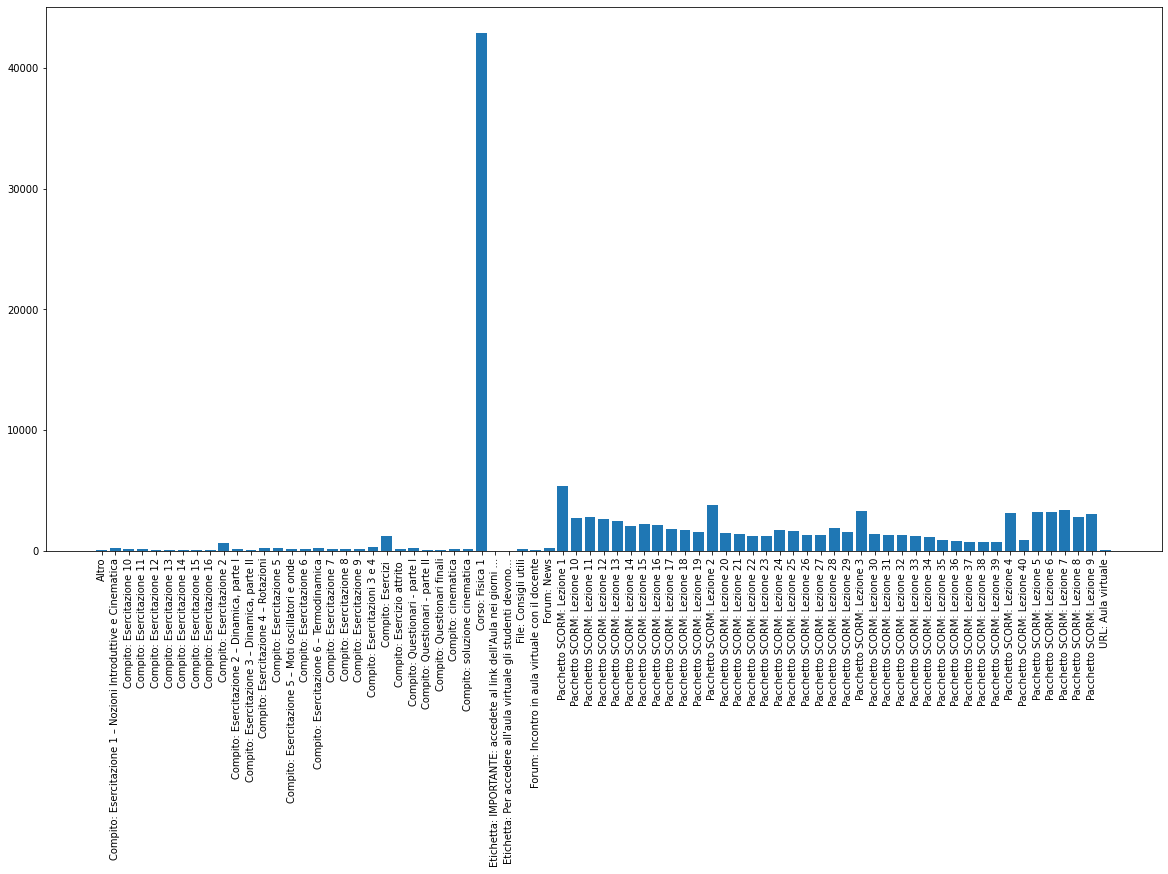

In [424]:
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
x_pos = df.groupby(by=["context"]).size().index # index: passi ciò che c'è a sinistra: compito, pacchetto ecc
height = df.groupby(by=["context"]).size().values

# dimensioni figura
plt.figure(figsize=(20,10))
    
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(rotation=90)
 
# Show graphic
plt.show()

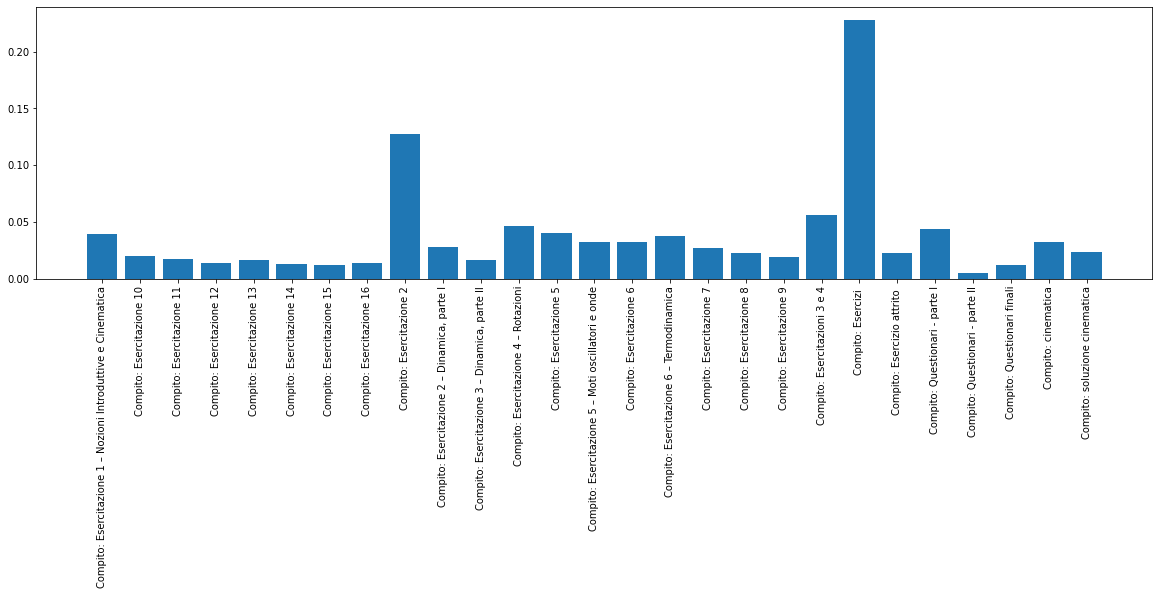

In [393]:
# SOLO COMPITI:
df_compito = df[df['context'].str.contains("Compito:")]
x_pos = df_compito.groupby(by=["context"]).size().index
height = df_compito.groupby(by=["context"]).size().values

# dimensioni figura
plt.figure(figsize=(20,5))

# Create bars
plt.bar(x_pos, height/np.sum(height))
 
# Create names on the x-axis
plt.xticks(rotation=90)
 
# Show graphic
plt.show()

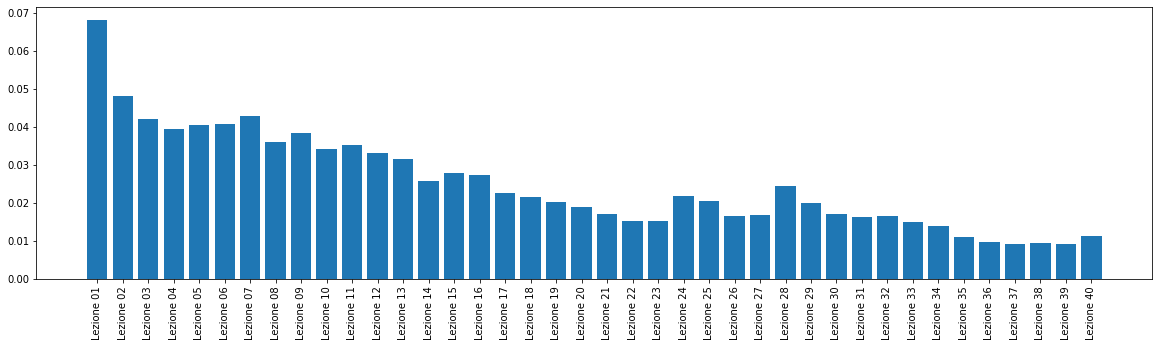

In [394]:
# SOLO PACCHETTI:
df_pacchetto = df[df['context'].str.contains("Pacchetto")]
x_pos = df_pacchetto.groupby(by=["context"]).size().index
height = df_pacchetto.groupby(by=["context"]).size().values

# dimensioni figura
plt.figure(figsize=(20,5))

x_pos_adj = []

for l in x_pos:
    x_pos_adj.append('Lezione ' + l.split()[-1].rjust(2,'0'))

x_pos_adj, height = zip(*sorted(zip(x_pos_adj, height)))

# Create bars
plt.bar(x_pos_adj, height/np.sum(height))

# Create names on the x-axis
plt.xticks(rotation=90)

# Show graphic
plt.show()

# Barplot dove, per ogni tipo di evento, quante interazioni sono relative a quell'evento (event)
Bar plot per ogni tipo di evento: stessa cosa che ho scritto nel messaggio immediatamente qui sopra, ma da fare per la colonna event


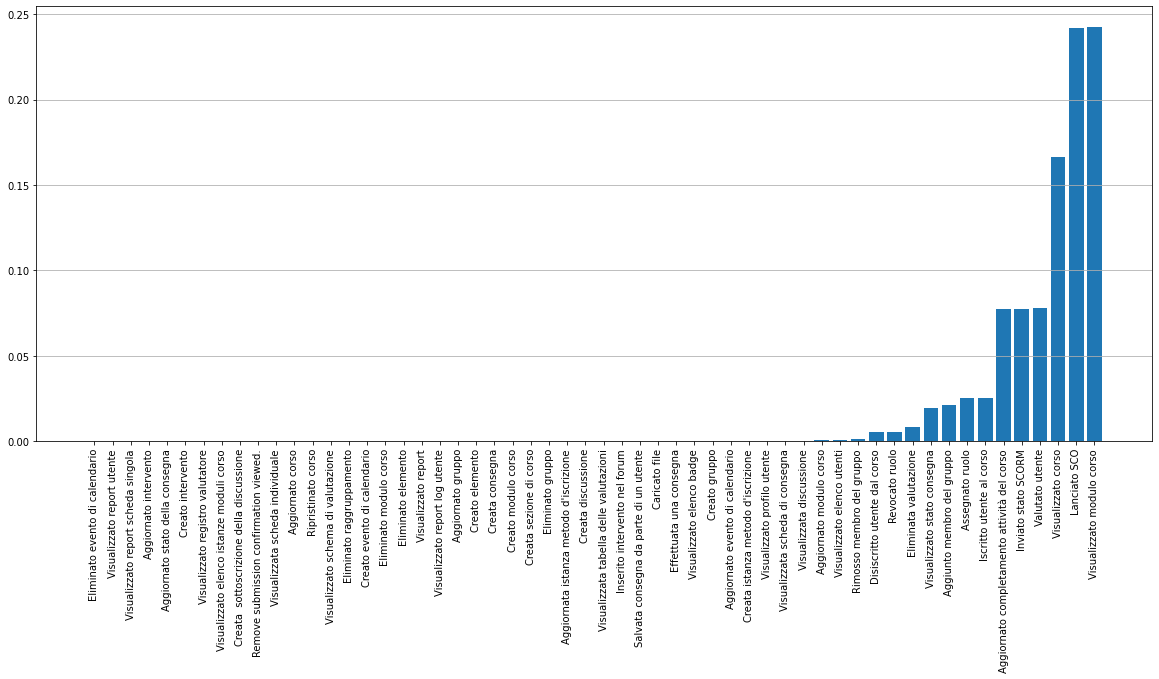

In [395]:
x_pos = df.groupby(by=["event"]).size().sort_values().index # index: passi ciò che c'è a sinistra: compito, pacchetto ecc
height = df.groupby(by=["event"]).size().sort_values().values / len(df.index)

# dimensioni figura
plt.figure(figsize=(20,8))
    
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(rotation=90)

plt.grid(axis='y')
 
# Show graphic
plt.show()

# Eventi:
- Aggiornato modulo corso
- Visualizzato elenco utenti: l'utente visualizza gli utenti iscritti al corso
- Rimosso membro del gruppo
- Disiscritto utente dal corso
- Revocato ruolo
- Eliminata valutazione
- x Visualizzato stato consegna 
- Aggiunto membro del gruppo
- Assegnato ruolo
- Iscritto utente al corso
- x Aggiornato completamento attività del corso
- x Inviato stato SCORM: completamento videolezione 
- x Valutato utente
- x Visualizzato corso: quando l'utente entra nella pagina di quel corso
- x Lanciato SCO: quando l'utente apre una videolezione
- x Visualizzato modulo corso: quando l'utente visualizza una lezione relativa a quel corso 

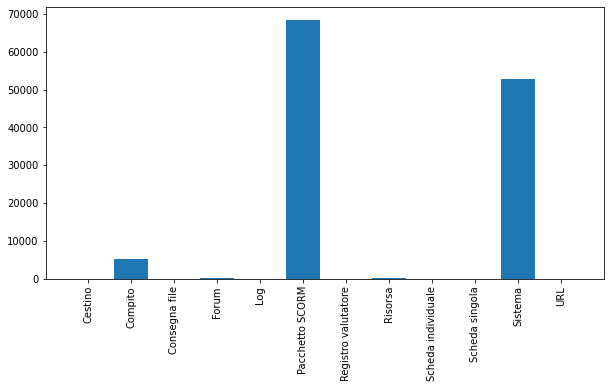

In [396]:
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
x_pos = df.groupby(by=["component"]).size().index # index: passi ciò che c'è a sinistra: compito, pacchetto ecc
height = df.groupby(by=["component"]).size().values

# dimensioni figura
plt.figure(figsize=(10,5))
    
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(rotation=90)
 
# Show graphic
plt.show()

TODO:
1. Plot 2 Separare compiti da pacchetti -> 2 plot
2. Eventi: fare una lista per ogni evento capire come e quando viene generato in moodle es. visualizzato corso -> quando l'utente entra nella pagina di quel corso
3. Prendiamo un utente (variabile con id di utente):
    - creiamo un dataframe con solo le attività di quell'utente (a partire da df) -> user_id = first_name_18 last_name, df equal to user_id: df_user = - 
    df[df['user_id'] == user_id]
    - creare una lista con gli indicatori associati ad un utente: (analisi per predire dropout degli studenti di moodle)
        - numero totale di interazioni nel corso
        - numero totale di accessi alla pagina del corso
        - numero medio di accessi ai pacchetti
        - numero medio di accesso ai compiti
        - numero pacchetti completati univoci
        - deviazione standard del numero di accessi ai pacchetti
        - deviazione standard del numero di accessi ai compiti
        - numero di compiti completati univoci
        
        Risultato finale: lista di valori
        guardare lezione 1 mirko sui pandas per i filtri, slides 98-99

- Fare gli append per tutti gli indicatori
- Aggiungere i nomi degli altri indicatori
- Calcolare questi indicatori per ogni utente

- Pensare ad altri indicatori utili
- Creare il df sulla base della lista dell'utente: ogni riga rappresenta un utente (1 riga) e ogni colonna e' un indicatore (es. media acc. pacc.)
- Indicatore che dice se l'utente ha completato tutti i pacchetti (1) altrimenti (0)
- Una volta creato il df, metti dentro un for e estendi il df per tutti gli utenti
- Creare un grid plot 3 x 4, dove ogni plot ci mostra la distribuzione dei valori (e.g., un'istogramma) per uno specifico indicatore, un plot per ogni indicatore

In [426]:
# Creazione dataframe relativo ad un singolo utente
indicators = []

for user_name in tqdm(df['user_id'].unique()):
    user_indicators = []
    df_user = df[df['user_id'] == user_name]
    user_indicators.append(user_name)
    
    # Calcolo il numero totale di interazioni nel corso
    n_interaction = len(df_user.index)
    user_indicators.append(n_interaction)
    #print("Numero totale di interazioni nel corso: ", n_interaction)

    # Numero totale di accessi alla pagina del corso
    # Visualizzato corso
    access_course = len(df_user[df_user.event.str.contains("Visualizzato corso")].context)
    user_indicators.append(access_course)
    #print("Numero totale di accessi alla pagina del corso: ", access_course)

    # Numero totale di accessi ai pacchetti
    df_user_pacchetto = len(df_user[df_user['context'].str.contains("Pacchetto")])
    user_indicators.append(df_user_pacchetto)
    #print("Numero totale di accessi ai pacchetti: ", df_user_pacchetto)

    # Numero totale di accessi ai compiti
    df_user_compito = len(df_user[df_user['context'].str.contains("Compito")])
    user_indicators.append(df_user_compito)
    #print("Numero totale di accessi ai compiti: ", df_user_compito)

    # Numero medio di accessi ai pacchetti 
    # dato un utente, per ogni pacchetto, fai il calcolo del numero di accessi che quell'utente ha effettuato al pacchetto, 
    # poi ripeti per tutti gli altri pacchetti (e metti in una lista), e l'indicatore finale è la media dei valori in quella lista, 
    # ossia tra ciò che hai calcolato per ogni pacchetto

    mean_p = np.mean(df_user[df_user['context'].str.contains("Pacchetto")].groupby(by='context').size().values)
    if mean_p > 0:
        user_indicators.append(mean_p)
    else:
        user_indicators.append(np.nan)
    #print("Numero medio di accessi ai pacchetti", mean_p)

    # Numero medio di accessi ai compiti
    # Come si nota dal df sotto, i compiti sono tutti: Compito: Esercizi, Compito: Questionari - parte I, Compito: Esercitazione 2

    mean_c = np.mean(df_user[df_user['context'].str.contains("Compito")].groupby(by='context').size().values)
    if mean_c > 0:
        user_indicators.append(mean_c)
    else:
        user_indicators.append(np.nan)
    #print("Numero medio di accessi ai compiti", mean_c)

    # Numero pacchetti con cui l'utente ha interagito 
    df_user_u_pacchetto = len(df_user[df_user.context.str.contains("Pacchetto")].context.unique())
    user_indicators.append(df_user_u_pacchetto)
    #print("Numero pacchetti completati univoci: ", df_user_u_pacchetto)

    # Deviazione standard del numero di accessi ai pacchetti
    dev_p = np.std(df_user[df_user['context'].str.contains("Pacchetto")].groupby(by='context').size().values)
    if dev_p > 0:
        user_indicators.append(dev_p)
    else:
        user_indicators.append(np.nan)
    #print("Deviazione standard del numero di accessi ai pacchetti: ", dev_p)

    # Deviazione standard del numero di accessi ai compiti
    dev_c = np.std(df_user[df_user['context'].str.contains("Compito")].groupby(by='context').size().values)
    if dev_c > 0:
        user_indicators.append(dev_c)
    else:
        user_indicators.append(np.nan)
    #print("Deviazione standard del numero di accessi ai compiti: ", dev_c)

    # Numero di pacchetti completati univoci
    df_progress = pd.read_csv(path_progress, sep=',', encoding='utf-8')
    user_progress = df_progress[df_progress['Unnamed: 0']==user_name]
    if len(user_progress.index) > 0:
        df_pacchetto = df[df['context'].str.contains("Pacchetto")]
        pacchetto_name = [l.split(': ')[-1] for l in df_pacchetto.groupby(by=["context"]).size().index]
        user_completion_p = [int(l == 'Completato') for l in user_progress[pacchetto_name].values[0]]
        user_indicators.append(user_completion_p)
    else:
        user_indicators.append(np.nan)
    #print("Numero di pacchetti completati univoci: ", np.sum(user_completion))

    # Numero di compiti completati univoci
    df_progress = pd.read_csv(path_progress, sep=',', encoding='utf-8')
    user_progress = df_progress[df_progress['Unnamed: 0']==user_name]
    if len(user_progress.index) > 0:
        df_compito = df[df['context'].str.contains("Compito")]
        compito_name = [l.split(': ')[-1] for l in df_compito.groupby(by=["context"]).size().index]
        user_completion_c = [int(l == 'Completato') for l in user_progress[set(compito_name) & set(user_progress.columns)].values[0]]
        user_indicators.append(user_completion_c)
    else:
        user_indicators.append(np.nan)
    
    #print("Numero compiti completati univoci: ", np.sum(user_completion))
    
    indicators.append(user_indicators)

100%|██████████| 931/931 [03:28<00:00,  4.46it/s]


In [427]:
user_indicators_names = ['user_name', 'n_int', 'n_access_course', 'n_access_pack', 'n_access_hw', 'avg_acc_pack', 'avg_acc_hw', 'n_pack_inter', 'dev_pack',
                         'dev_hw', 'pack_unique', 'hw_unique']
df_indicators = pd.DataFrame(indicators, columns =user_indicators_names)
print(df_indicators)

                           user_name  n_int  n_access_course  n_access_pack  \
0    firstaname_17711 lastname_17711    273               80            188   
1    firstaname_11460 lastname_11460    119               42             47   
2      firstaname_7768 lastname_7768    256               21            207   
3    firstaname_17715 lastname_17715    488               75            374   
4      firstaname_8925 lastname_8925    274               57            194   
..                               ...    ...              ...            ...   
926      firstaname_931 lastname_931      4                1              3   
927      firstaname_179 lastname_179    115               33             52   
928        firstaname_10 lastname_10     19                1              0   
929      firstaname_934 lastname_934      5                3              0   
930      firstaname_928 lastname_928      6                3              2   

     n_access_hw  avg_acc_pack  avg_acc_hw  n_pack_

In [428]:
df_indicators.to_csv('users_total.csv')

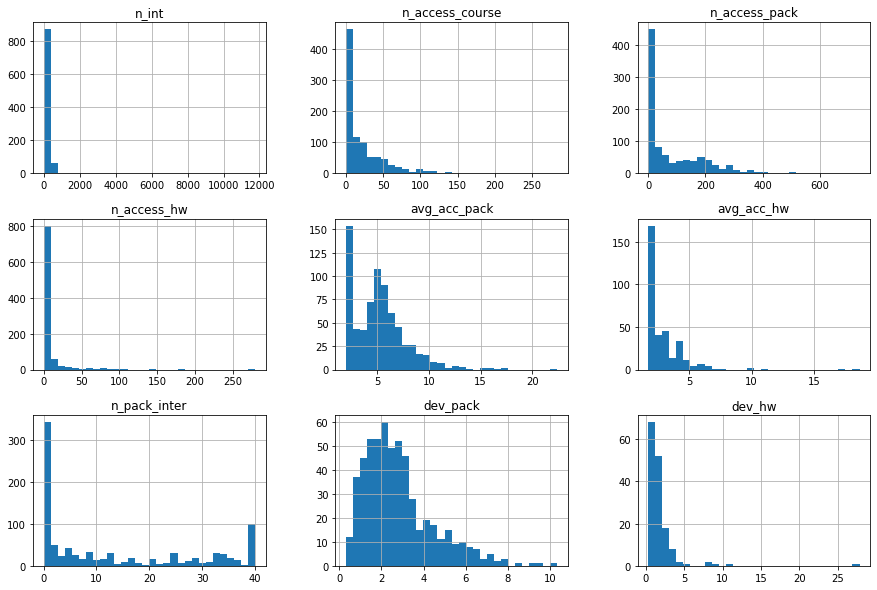

In [444]:
df_indicators.hist(bins=30, figsize=(15, 10));

# TODO:
- Per ogni studente creare un vettore di dim n=10 (settimane), composto da 0 e 1, 1 se l'utente ha fatto almeno un accesso nel corso, 0 altrimenti, a partire dalla prima settimana in cui ha acceduto al corso (matrice mxn -> m=studenti)
- Per ogni studente dobbiamo calcolare la matrice degli indicatori, solo relativa alla prima settimana di corso, poi 1-2 sett, 1-2-3 ecc
- Predire la label della settimana successiva
- Data una settimana i, dobbiamo avere una matrice con gli indicatori e dobbiamo predire le label della settimana i+1 (random forest, 80 20)
- Ad ogni riga del df, devi associare l'id della settimana dove è stata effettuata l'interazione dello studente
- Creiamo un dizionario dove per ogni utente abbiamo la chiave (id utente) e il valore (timestamp del primo accesso)
- usando .apply
